In [3]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Loading the data

data = pd.read_excel(r'C:\Users\HP\Downloads\Amazon_Data.xlsx')

In [5]:
data

,Id,Requester id,Group,Status,Priority,Via,Created at,Created Date,Created Month,Created Year,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,2023-04-08 20:52:00,8,4,2023,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,24,4,2023,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,2023-05-16 17:43:00,16,5,2023,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,2023-04-13 11:03:00,13,4,2023,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,2023-04-24 13:21:00,24,4,2023,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,344013,11283774362653,Support,Solved,Low,Mail,2023-05-31 22:37:00,31,5,2023,...,0,1,69.0,692.0,69.0,692.0,69.0,692.0,69.0,Others
16472,344014,7302298964893,Support,Solved,Low,Mail,2023-05-31 22:47:00,31,5,2023,...,0,3,90.0,6422.0,2929.0,6422.0,2929.0,6422.0,2930.0,Is my treatment covered (IMTC)
16473,344021,7303060862237,Support,Hold,Low,Mail,2023-05-31 23:16:00,31,5,2023,...,0,1,69.0,NaN,NaN,NaN,NaN,653.0,69.0,-
16474,344025,10098421736733,Reimbursement Claims,Solved,Low,Mail,2023-05-31 23:35:00,31,5,2023,...,0,2,280.0,12548.0,6223.0,12548.0,6223.0,12547.0,6223.0,-


In [6]:
# Converting date columns to datetime format

date_columns = ['Created Date', 'Updated Date', 'Assigned Date', 'Initially assigned Date', 'Solved Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col])

In [7]:
# Extracting month and year from date columns

for col in date_columns:
    data[col + '_Month'] = data[col].dt.month
    data[col + '_Year'] = data[col].dt.year

In [8]:
# Calculating resolution time in minutes

data['Resolution Time (minutes)'] = (data['Solved Date'] - data['Created Date']).dt.total_seconds() / 60

In [9]:
# Calculating requester wait time in minutes

data['Requester Wait Time (minutes)'] = (data['Assigned Date'] - data['Created Date']).dt.total_seconds() / 60

In [10]:
# Sales trend - month wise

monthly_sales = data.groupby('Created Month')['Id'].count()

In [11]:
# Sales trend - year wise

yearly_sales = data.groupby('Created Year')['Id'].count()

In [12]:
# Sales trend - yearly_month wise

yearly_monthly_sales = data.groupby(['Created Year', 'Created Month'])['Id'].count().unstack()

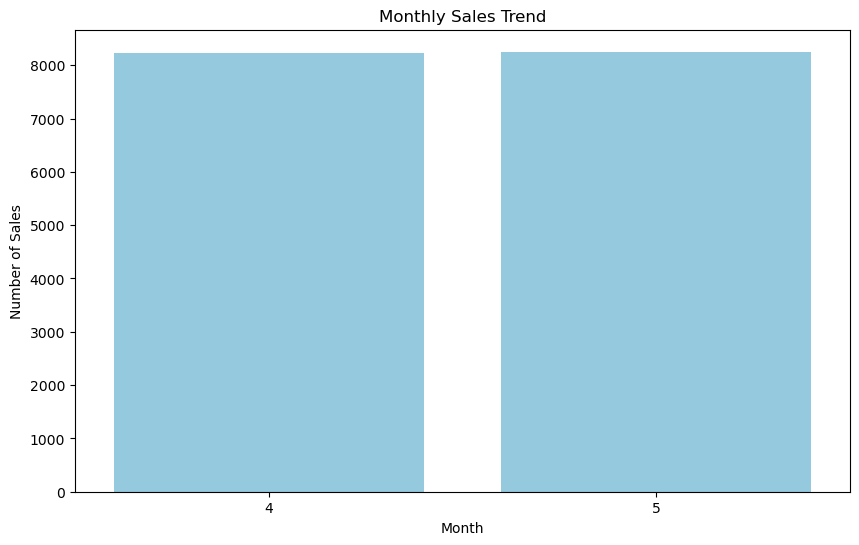

In [14]:
# Monthly Sales Trend

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, color='skyblue')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()

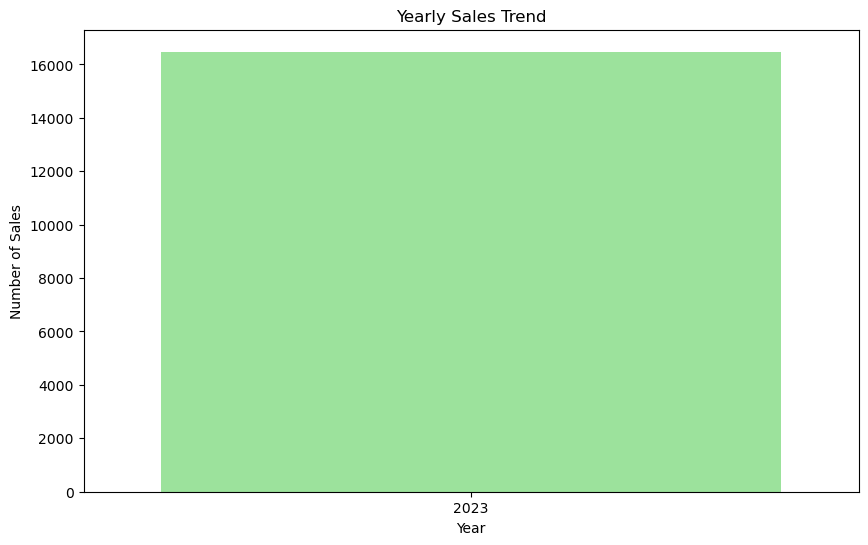

In [15]:
# Yearly Sales Trend

plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values, color='lightgreen')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

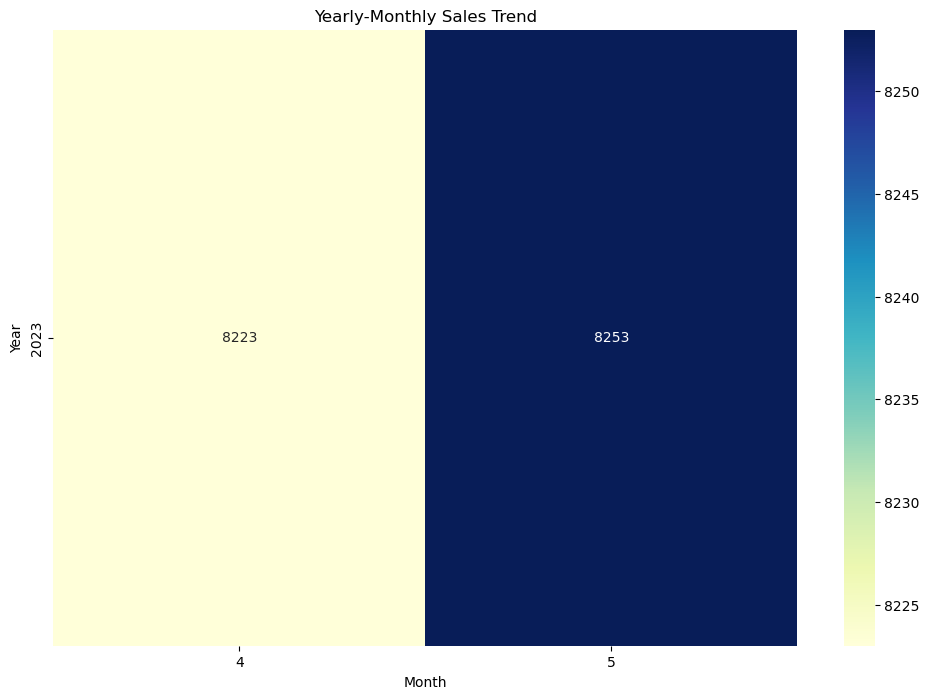

In [16]:
# Yearly-Monthly Sales Trend

plt.figure(figsize=(12, 8))
sns.heatmap(yearly_monthly_sales, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

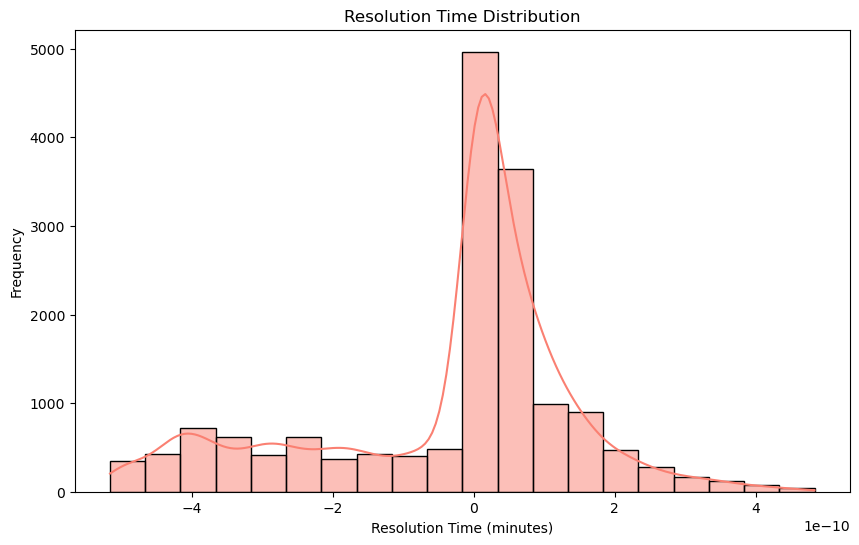

In [17]:
# Resolution Time Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Resolution Time (minutes)'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Resolution Time Distribution')
plt.xlabel('Resolution Time (minutes)')
plt.ylabel('Frequency')
plt.show()

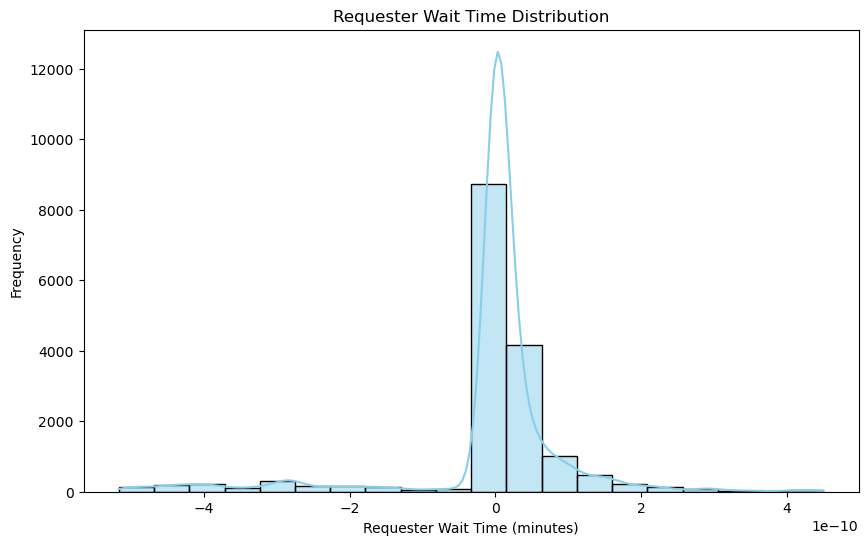

In [18]:
# Requester Wait Time Distribution

plt.figure(figsize=(10, 6))
sns.histplot(data['Requester Wait Time (minutes)'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Requester Wait Time Distribution')
plt.xlabel('Requester Wait Time (minutes)')
plt.ylabel('Frequency')
plt.show()

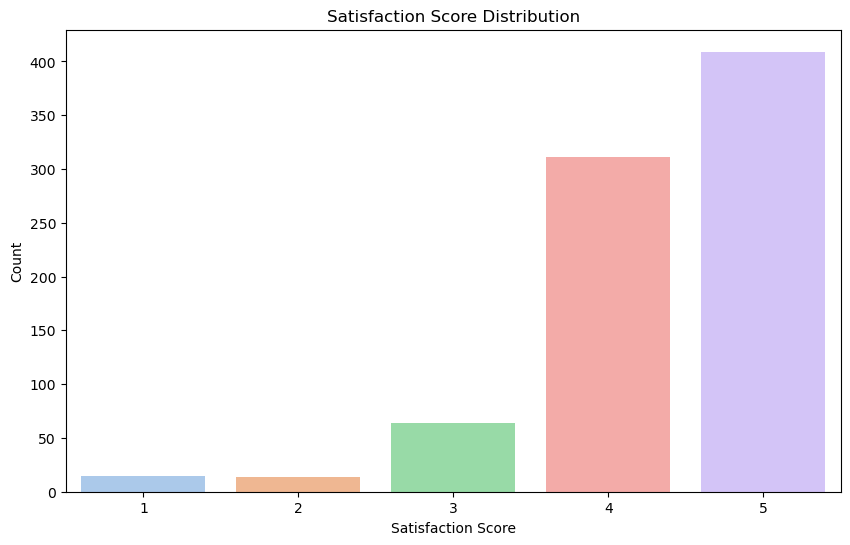

In [29]:
# Convert numeric_scores Series to a DataFrame
numeric_scores_df = numeric_scores.to_frame(name='Satisfaction Score')

# Satisfaction Score Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=numeric_scores_df, x='Satisfaction Score', palette='pastel')
plt.title('Satisfaction Score Distribution')
plt.xlabel('Satisfaction Score')
plt.ylabel('Count')
plt.show()

In [30]:
# Key metrics and factors

average_resolution_time = data['Resolution Time (minutes)'].mean()
average_requester_wait_time = data['Requester Wait Time (minutes)'].mean()
satisfaction_scores = data['Satisfaction Score'].value_counts()

In [34]:
print("Average Resolution Time (minutes):", average_resolution_time)
print("Average Requester Wait Time (minutes):", average_requester_wait_time)
print("Satisfaction Scores:")

Average Resolution Time (minutes): 4.945290054404304e-12
Average Requester Wait Time (minutes): -2.7110459074515547e-12
Satisfaction Scores:


In [33]:
# printing Satisfaction Scores

print(satisfaction_scores)

Satisfaction Score
5    409
4    311
3     64
1     15
2     14
Name: count, dtype: Int64
